# What are the limits of the long method

In [1]:
import numpy as np
%matplotlib notebook
import ipympl
import matplotlib.pyplot as plt

from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel
from astropy.modeling.models import Gaussian2D

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipympl/__init__.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "/Users/ryanr/anaconda3/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/ryanr/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/ryanr/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/User

In [63]:
from K2TranPixCode import *

/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2TranPixCode.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "/Users/ryanr/anaconda3/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/ryanr/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/ryanr/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/r

In [27]:
gauss = Gaussian2D(100, 2, 5.5, 1, 1)

In [32]:
x = np.arange(-0, 10)
y = np.arange(0, 10)
x, y = np.meshgrid(x, y)

gauss = Gaussian2D(100, 2, 5.5, 1, 1)

data_2D = gauss(x, y)

<IPython.core.display.Javascript object>


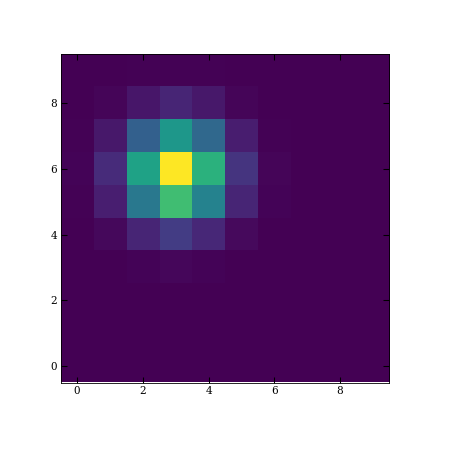

In [57]:
plt.figure()
plt.imshow(data_2D,origin='lower')

In [20]:
np.where(gauss(x, y) == np.nanmax(gauss(x, y)))

(array([10]), array([10]))

In [30]:
import lightkurve as lk

/Users/ryanr/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ryanr/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [31]:
tpf = lk.KeplerTargetPixelFile('/Users/ryanr/Documents/PhD/coding/Kepler/Data/ktwo248442273-c14_lpd-targ.fits.gz')

In [70]:
x = np.arange(-0, tpf.flux.shape[1])
y = np.arange(0, tpf.flux.shape[2])
x, y = np.meshgrid(x, y)

seed = [np.random.rand()*tpf.flux.shape[1],np.random.rand()*tpf.flux.shape[2]]  

gauss = Gaussian2D(100, seed[0], seed[1], 1, 1)

data_2D = gauss(x, y)

start = 100
length = 100

seeded = np.copy(tpf.flux)
seeded = seeded[start:start+length] + data_2D

In [62]:
seeded = tpf.flux+data_2D

In [34]:
Find_Long_Events()

8.536653286614202

In [53]:
tpf.flux.shape[1]

10

In [195]:
def Blur_seed(TPF,Model,Start, Mag):
    x = np.arange(-0, TPF.flux.shape[1])
    y = np.arange(0, TPF.flux.shape[2])
    x, y = np.meshgrid(x, y)

    seed = [np.random.rand()*TPF.flux.shape[1],np.random.rand()*TPF.flux.shape[2]]  
    if 'K' in Model:
        model_lc = KSN2017K(Mag, Start, TPF.time)
    elif 'E' in Model:
        model_lc = KSN2015E(Mag, Start, TPF.time)
    
    Seeded = np.copy(TPF.flux)
    for i in range(len(TPF.time)):
        gauss = Gaussian2D(model_lc[i], seed[0], seed[1], 1, 1)

        data_2D = gauss(x, y)
        Seeded[i] += data_2D
    return Seeded

In [71]:
import pandas as pd

In [85]:
sn = pd.read_csv('/Users/ryanr/Documents/PhD/coding/Kepler/Data/SNReference/SN2017jgi_ap5_v2.csv').values



In [88]:
sn[:,1]

array([        nan, 1253.277238, 1229.543555, ..., 1268.754573,
       1304.782518,         nan])

<IPython.core.display.Javascript object>


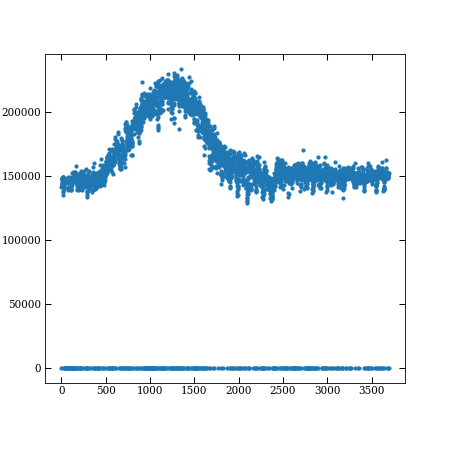

In [204]:
plt.figure()
plt.plot(np.nansum(Blur_seed(tpf,'K',0,15),axis=(1,2)),'.')

In [178]:
def KSN2017K(Magnitude,Start,Time):
    K = np.zeros(len(Time))
    Raw = pd.read_csv('/Users/ryanr/Documents/PhD/coding/Kepler/Data/SNReference/SN2017jgi_ap5_v2.csv').values
    Eventstart = 0 #np.where(Raw[:,0]==2400.008166)[0][0]
    Eventend = -1 #np.where(Raw[:,0]==2430.985510)[0][0]
    # Columns of Raw are, Time, Counts, Background subtracted counts
    Counts = Raw[:,1] - np.nanmedian(Raw[100:200,1])
    m1 = -5/2*np.log10(Counts)+25.47
    LCmax = np.nanmin(m1)
    Counts2 = Counts*10**(2/5*(LCmax - Magnitude))
    Counts2 = Counts2[Eventstart:Eventend]
    if len(Counts2) > len(K[Start:]):
        K[Start:] += Counts2[:(len(K)-Start)]
    elif len(K[Start:]) > len(Counts2):
        K[Start:Start+len(Counts2)] += Counts2
    else:
        K[Start:] += Counts2
    K[K<0] = 0
    return K 

def KSN2015E(Magnitude,Start,Time):
    K = np.zeros(len(Time))
    Raw = np.loadtxt('/Users/ryanr/Documents/PhD/coding/Kepler/Data/SNReference/KSN2015e_ap3_v2.txt')
    Eventstart = 0 #np.where(Raw[:,0]==2400.008166)[0][0]
    Eventend = -1 #np.where(Raw[:,0]==2430.985510)[0][0]
    # Columns of Raw are, Time, Counts, Background subtracted counts
    Counts = Raw[:,1]
    Counts[Counts == 0] = np.nan
    Counts = Counts - np.nanmedian(Raw[200:300,1])
    m1 = -5/2*np.log10(Counts)+25.47
    LCmax = np.nanmin(m1)
    Counts2 = Counts*10**(2/5*(LCmax - Magnitude))
    Counts2 = Counts2[Eventstart:Eventend]
    if len(Counts2) > len(K[Start:]):
        K[Start:] += Counts2[:(len(K)-Start)]
    elif len(K[Start:]) > len(Counts2):
        K[Start:Start+len(Counts2)] += Counts2
    else:
        K[Start:] += Counts2
    K[K<0] = 0
    return K 

In [167]:
KSN2075K(19,100,tpf.time)

array([0.        , 0.        , 0.        , ..., 0.        , 9.09839091,
       0.        ])

<IPython.core.display.Javascript object>


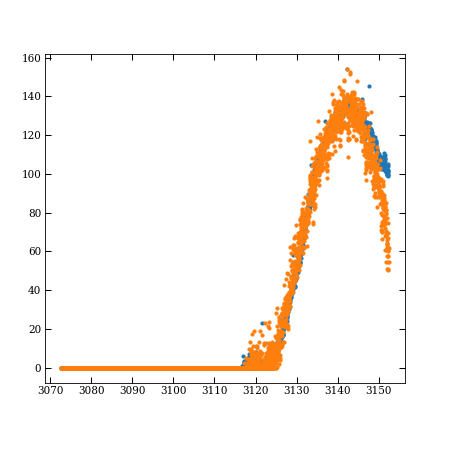

In [207]:
plt.figure()
plt.plot(tpf.time,KSN2015E(20,2000,tpf.time),'.')
plt.plot(tpf.time,KSN2017K(20,2000,tpf.time),'.')

<IPython.core.display.Javascript object>


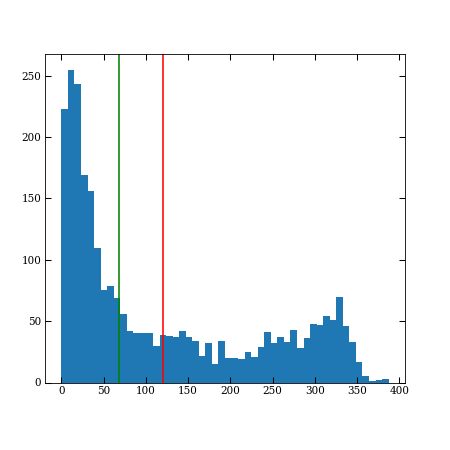

In [147]:
plt.figure()
n = plt.hist(KSN2075K(19,100,tpf.time)[np.isfinite(KSN2075K(19,100,tpf.time)) & (KSN2075K(19,100,tpf.time) > 0)],bins=50)



plt.axvline(np.nanmean(KSN2075K(19,100,tpf.time)[np.isfinite(KSN2075K(19,100,tpf.time)) & (KSN2075K(19,100,tpf.time) > 0)]),color='red')
plt.axvline(np.nanmedian(KSN2075K(19,100,tpf.time)[np.isfinite(KSN2075K(19,100,tpf.time)) & (KSN2075K(19,100,tpf.time) > 0)]),color='green')

In [149]:
number = n[0] 
bins = n[1]

In [150]:
np.where(number == max(number))

(array([1]),)

In [ ]:
np.histogram()

In [153]:
n = np.histogram(KSN2075K(19,100,tpf.time)[np.isfinite(KSN2075K(19,100,tpf.time)) & (KSN2075K(19,100,tpf.time) > 0)],bins=50)
number = n[0] 
bins = n[1]

binwidth = bins[1] - bins[0]
newbins = bins[:-1]
newbins += binwidth
mode = newbins[np.where(number == max(number))]

In [154]:
mode

array([15.52268177])

In [213]:
mag = np.arange(12,24,0.1)
med = np.zeros((2,len(mag)))
mean = np.zeros((2,len(mag)))
skew = np.zeros((2,len(mag)))
mode = np.zeros((2,len(mag)))
for i in range(len(mag)):
    lc = KSN2017K(mag[i],2000,tpf.time)
    med[0,i] = np.nanmedian(lc)
    mean[0,i] = np.nanmean(lc)
    skew[0,i] = np.nanmean(lc)
    lc = KSN2015E(mag[i],2000,tpf.time)
    med[1,i] = np.nanmedian(lc)
    mean[1,i] = np.nanmean(lc)
    skew[1,i] = np.nanmean(lc)
    
    

In [209]:
n = np.histogram(lc[np.isfinite(lc) & (lc > 0)],bins=50)
number = n[0] 
bins = n[1]

binwidth = bins[1] - bins[0]
newbins = bins[:-1]
newbins += binwidth
mode[i] = newbins[np.where(number == max(number))]


IndexError: index 119 is out of bounds for axis 0 with size 2

<IPython.core.display.Javascript object>


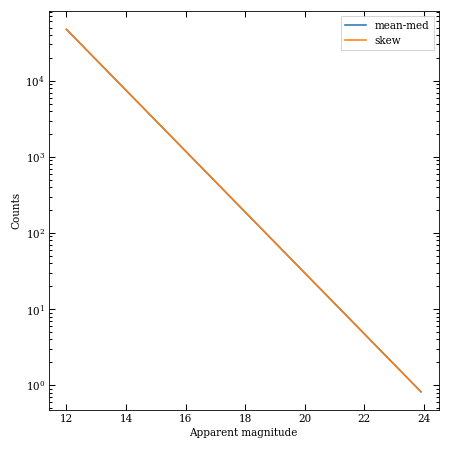

In [215]:
plt.figure()
plt.plot(mag,mean[0]-med[0],label='mean-med')
plt.plot(mag,skew[0],label='skew')
#plt.plot(mag,mean[0]-mode[0],label='mean-mode')
plt.yscale('log')
plt.ylabel('Counts')
plt.xlabel('Apparent magnitude')
plt.legend()
plt.tight_layout()

In [174]:
e = mean-med

In [176]:
k = mean-med

<IPython.core.display.Javascript object>


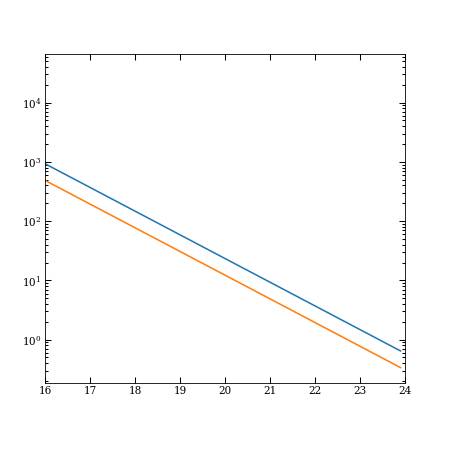

In [188]:
plt.figure()
plt.plot(mag,mean[0]-med[0])
plt.plot(mag,mean[1]-med[1])
plt.xlim(16,24)
plt.yscale('log')

<IPython.core.display.Javascript object>


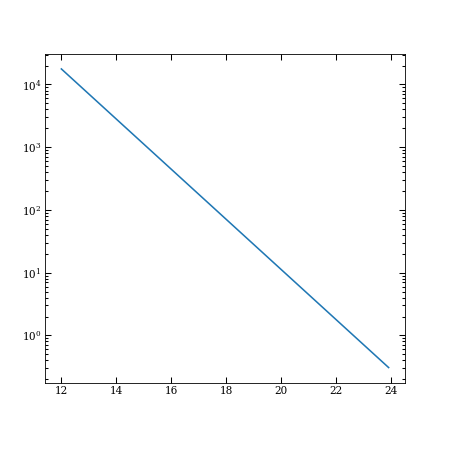

In [190]:
plt.figure()
plt.plot(mag,(mean[0]-med[0]) - (mean[1]-med[1]))

plt.yscale('log')

In [231]:
with np.load('/Users/ryanr/Documents/PhD/coding/Kepler/K2/Limit/230533709_VLimit.npz') as data:
    lim = data['arr_0']

In [236]:
lim = np.load('/Users/ryanr/Documents/PhD/coding/Kepler/K2c16/Limit/211545516_VLimit.npy')

In [237]:
lim

array([[[ 2.20791925,  2.20791925,  2.20791925,  2.20791925,
          2.20791925,  2.20791925,  2.20791925,  2.20791925],
        [ 2.20791925,  2.20791925,  2.20791925,  0.        ,
          0.        ,  2.20791925,  2.20791925,  2.20791925],
        [ 2.20791925,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  2.20791925,  2.20791925],
        [ 2.20791925,  2.20791925,  0.        ,  0.        ,
          0.        ,  0.        ,  2.20791925,  2.20791925],
        [ 2.20791925,  2.20791925,  0.        ,  0.        ,
          0.        ,  0.        ,  2.20791925,  2.20791925],
        [ 2.20791925,  2.20791925,  2.20791925,  2.20791925,
          2.20791925,  2.20791925,  2.20791925,  7.87759131],
        [ 2.20791925,  2.20791925,  2.20791925,  2.20791925,
          2.20791925,  2.20791925,  2.20791925,  4.05129824],
        [ 2.20791925,  2.20791925,  2.20791925,  2.20791925,
          2.20791925,  2.75115972, 12.33488168,  0.        ]],

       [[ 0.  